In [44]:
'''
IMDB数据集，它包含来自互联网电影数据库（IMDB）的50 000条严重两极化的评论。数据集被分为25 000条用于训练的评论与25 000条用于测试的评论，训练集和测试集都包含50%的正面评论与50%的负面评论。
它已经过预处理：评论（单词序列）已被转换为整数序列，其中每个整数对应字典中的某个单词。这样一来，我们就可以专注于模型的构建、训练与评估。
'''
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/xun/app/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/xun/app/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [45]:
print(train_data.shape,test_data.shape)

(25000,) (25000,)


In [46]:
train_data[0:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [47]:
max([max(sequence) for sequence in train_data])

9999

In [48]:
#将评论解码为文本
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i -3,"?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [49]:
#用multi-hot编码对整数序列进行编码
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  #创建一个形状为(len(sequences), dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.  #将results[i]某些索引对应的值设为1
    return results
x_train = vectorize_sequences(train_data)  ##将训练数据向量化
x_test = vectorize_sequences(test_data)  #将测试数据向量化

In [50]:
x_train.shape

(25000, 10000)

In [51]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

#模型定义
model=keras.Sequential([
    layers.Dense(16,activation="relu"), #带有relu激活函数的Dense层张量运算：output = relu(dot(input, W) + b)
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [53]:
#编译模型-rmsprop优化器和binary_crossentropy损失函数来配置模型
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [54]:
#训练集、验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
#训练模型-使用由512个样本组成的小批量，对模型训练20轮，即对训练数据的所有样本进行20次迭代。
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5082 - accuracy: 0.8011 - val_loss: 0.3927 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3132 - accuracy: 0.9003 - val_loss: 0.3100 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2286 - accuracy: 0.9257 - val_loss: 0.2805 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1811 - accuracy: 0.9414 - val_loss: 0.2749 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1458 - accuracy: 0.9539 - val_loss: 0.2773 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1203 - accuracy: 0.9633 - val_loss: 0.3224 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1008 - accuracy: 0.9701 - val_loss: 0.3075 - val_accuracy: 0.8822
Epoch 8/20
30

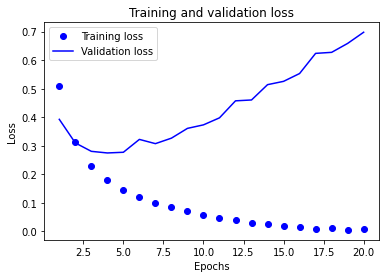

In [56]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")  # "bo"表示“蓝色圆点”
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # "b"表示“蓝色实线”
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

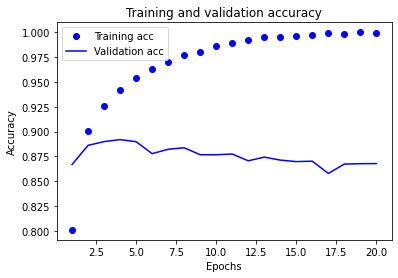

In [57]:
plt.clf()  #清空图像
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

> 训练损失每轮都在减小，训练精度每轮都在提高。这正是梯度下降优化的预期结果——我们想要最小化的量随着每次迭代变得越来越小。但验证损失和验证精度并非如此，它们似乎在第4轮达到峰值。这正是我之前警告过的一种情况：模型在训练数据上的表现越来越好，但在前所未见的数据上不一定表现得越来越好。准确地说，这种现象叫作过拟合（overfit）：在第4轮之后，你对训练数据过度优化，最终学到的表示仅针对于训练数据，无法泛化到训练集之外的数据。

>优化方案：
* 可以尝试使用一个或三个表示层，然后观察这么做对验证精度和测试精度的影响。
* 尝试使用更多或更少的单元，比如32个或64个。
* 尝试使用mse损失函数代替binary_crossentropy。
* 尝试使用tanh激活函数（这种激活函数在神经网络早期非常流行）代替relu。

In [59]:
#预测数据
model.predict(x_test)

array([[0.00526142],
       [1.        ],
       [0.45768264],
       ...,
       [0.00202808],
       [0.02440223],
       [0.73044676]], dtype=float32)